In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
from scipy.stats import linregress
from pandas.io.json import json_normalize
import json

In [2]:
movies = "movie_data.csv"
movie_data = pd.read_csv(movies)
movie_data.head()

,Unnamed: 0,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year,metacritic,synopsis,cast
0,0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,700059566.0,2018,88.0,"T'Challa, heir to the hidden but advanced king...","Chadwick Boseman, Michael B. Jordan, Lupita Ny..."
1,1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,678815482.0,2018,68.0,The Avengers and their allies must be willing ...,"Robert Downey Jr., Chris Hemsworth, Mark Ruffa..."
2,2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,608581744.0,2018,80.0,The Incredibles hero family takes on a new mis...,"Craig T. Nelson, Holly Hunter, Sarah Vowell, H..."
3,3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,416769345.0,2018,51.0,When the island's dormant volcano begins roari...,"Chris Pratt, Bryce Dallas Howard, Rafe Spall, ..."
4,4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,318491426.0,2018,66.0,Foul-mouthed mutant mercenary Wade Wilson (a.k...,"Ryan Reynolds, Josh Brolin, Morena Baccarin, J..."


In [3]:
ratings_data = movie_data[["title", "worldwide_gross", "imdb_rating", "metacritic"]].copy()
#Adjust Imdb rating to percentage
ratings_data.loc[:,"imdb_ratings_adj"] = ratings_data.loc[:,"imdb_rating"]*10
#Adjust worldwide gross to $millions
ratings_data.loc[:,"worldwide_gross_adj"] = ratings_data.loc[:,"worldwide_gross"]/100_000_000
#Add average rating column
ratings_data.loc[:, "average_rating"] = (ratings_data.loc[:,"imdb_ratings_adj"] + ratings_data.loc[:,"metacritic"])/2
ratings_data


,title,worldwide_gross,imdb_rating,metacritic,imdb_ratings_adj,worldwide_gross_adj,average_rating
0,Black Panther,700059566.0,7.4,88.0,74.0,7.000596,81.0
1,Avengers: Infinity War,678815482.0,8.5,68.0,85.0,6.788155,76.5
2,Incredibles 2,608581744.0,7.8,80.0,78.0,6.085817,79.0
3,Jurassic World: Fallen Kingdom,416769345.0,6.2,51.0,62.0,4.167693,56.5
4,Deadpool 2,318491426.0,7.8,66.0,78.0,3.184914,72.0
...,...,...,...,...,...,...,...
93,Madagascar: Escape 2 Africa,603900354.0,6.7,61.0,67.0,6.039004,64.0
94,Quantum of Solace,586090727.0,6.7,58.0,67.0,5.860907,62.5
95,Iron Man,585174222.0,7.9,79.0,79.0,5.851742,79.0
96,WALL-E,521311860.0,8.4,95.0,84.0,5.213119,89.5


In [18]:
#Add average rating column
ratings_data.loc[:, "average_rating"] = (ratings_data.loc[:,"imdb_ratings_adj"] + ratings_data.loc[:,"metacritic"])/2
ratings_data

,title,worldwide_gross,imdb_rating,metacritic,imdb_ratings_adj,worldwide_gross_adj,average_rating,Gross Group
0,Black Panther,700059566.0,7.4,88.0,74.0,7.000596,81.0,500M to 750M
1,Avengers: Infinity War,678815482.0,8.5,68.0,85.0,6.788155,76.5,500M to 750M
2,Incredibles 2,608581744.0,7.8,80.0,78.0,6.085817,79.0,500M to 750M
3,Jurassic World: Fallen Kingdom,416769345.0,6.2,51.0,62.0,4.167693,56.5,300M to 500M
4,Deadpool 2,318491426.0,7.8,66.0,78.0,3.184914,72.0,300M to 500M
...,...,...,...,...,...,...,...,...
93,Madagascar: Escape 2 Africa,603900354.0,6.7,61.0,67.0,6.039004,64.0,500M to 750M
94,Quantum of Solace,586090727.0,6.7,58.0,67.0,5.860907,62.5,500M to 750M
95,Iron Man,585174222.0,7.9,79.0,79.0,5.851742,79.0,500M to 750M
96,WALL-E,521311860.0,8.4,95.0,84.0,5.213119,89.5,500M to 750M


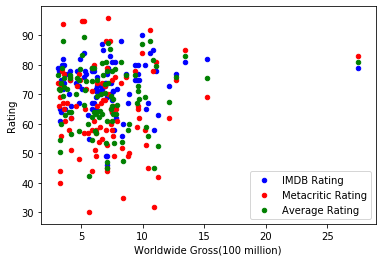

In [19]:
# Create a Scatter Plot for imdb_rating vs metacritic
ax = ratings_data.plot(kind="scatter", x="worldwide_gross_adj",y="imdb_ratings_adj", color="b", label="IMDB Rating")
ratings_data.plot(x="worldwide_gross_adj",y=("metacritic"), color="r", kind = "scatter", label="Metacritic Rating", ax=ax)
ratings_data.plot(x="worldwide_gross_adj",y=("average_rating"), color="g", kind = "scatter", label="Average Rating", ax=ax)
plt.xlim()
plt.xlabel('Worldwide Gross(100 million)')
plt.ylabel('Rating')
plt.show()


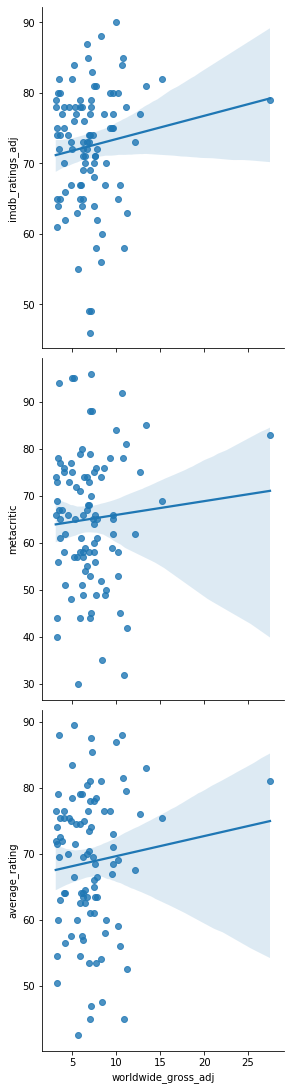

In [37]:
sns.pairplot(ratings_data, x_vars=["worldwide_gross_adj"], y_vars=["imdb_ratings_adj", "metacritic", "average_rating"], height=5, aspect=.8, 
             kind="reg")     

In [28]:
bins = [300_000_000, 500_000_000, 750_000_000, 1_000_000_000, 3_000_000_000]
group_labels = ["300M to 500M", "500M to 750M", "750M to 1B", "1B to 3B"]
pd.cut(ratings_data["worldwide_gross"], bins, labels=group_labels)

0     500M to 750M
1     500M to 750M
2     500M to 750M
3     300M to 500M
4     300M to 500M
          ...     
93    500M to 750M
94    500M to 750M
95    500M to 750M
96    500M to 750M
97    300M to 500M
Name: worldwide_gross, Length: 98, dtype: category
Categories (4, object): [300M to 500M < 500M to 750M < 750M to 1B < 1B to 3B]

In [29]:
ratings_data["Gross Group"] = pd.cut(ratings_data["worldwide_gross"], bins, labels=group_labels)
ratings_data

,title,worldwide_gross,imdb_rating,metacritic,imdb_ratings_adj,worldwide_gross_adj,average_rating,Gross Group
0,Black Panther,700059566.0,7.4,88.0,74.0,7.000596,81.0,500M to 750M
1,Avengers: Infinity War,678815482.0,8.5,68.0,85.0,6.788155,76.5,500M to 750M
2,Incredibles 2,608581744.0,7.8,80.0,78.0,6.085817,79.0,500M to 750M
3,Jurassic World: Fallen Kingdom,416769345.0,6.2,51.0,62.0,4.167693,56.5,300M to 500M
4,Deadpool 2,318491426.0,7.8,66.0,78.0,3.184914,72.0,300M to 500M
...,...,...,...,...,...,...,...,...
93,Madagascar: Escape 2 Africa,603900354.0,6.7,61.0,67.0,6.039004,64.0,500M to 750M
94,Quantum of Solace,586090727.0,6.7,58.0,67.0,5.860907,62.5,500M to 750M
95,Iron Man,585174222.0,7.9,79.0,79.0,5.851742,79.0,500M to 750M
96,WALL-E,521311860.0,8.4,95.0,84.0,5.213119,89.5,500M to 750M


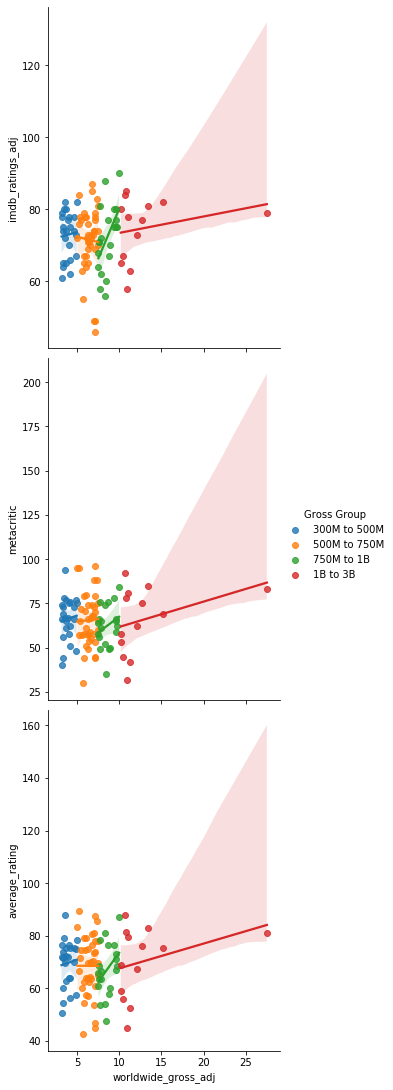

In [38]:
sns.pairplot(ratings_data, x_vars=["worldwide_gross_adj"], y_vars=["imdb_ratings_adj", "metacritic", "average_rating"], hue = "Gross Group",
             height=5, aspect=.8, kind="reg") 

In [32]:
correlation_data = ratings_data.corr()[["worldwide_gross"]]
correlation_data.style.background_gradient(cmap='coolwarm').set_precision(2)


,worldwide_gross
worldwide_gross,1.00
imdb_rating,0.13
metacritic,0.07
imdb_ratings_adj,0.13
worldwide_gross_adj,1.00
average_rating,0.09


In [33]:
correlation_data = ratings_data.groupby('Gross Group').corr()[["worldwide_gross"]]

correlation_data.style.background_gradient(cmap='coolwarm').set_precision(2)


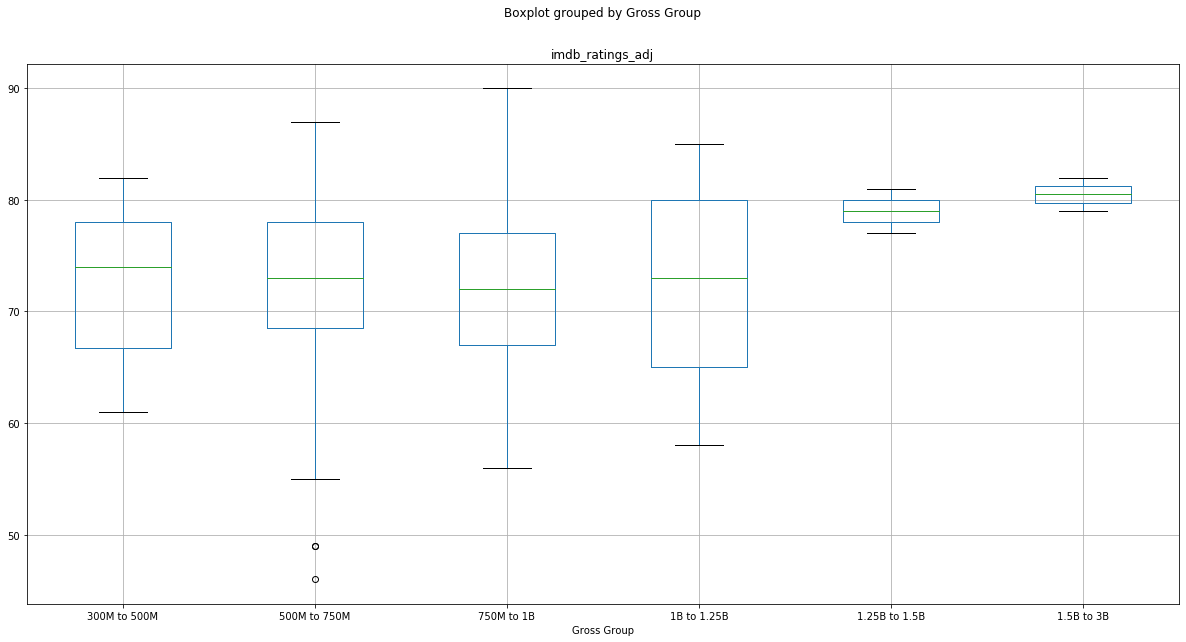

In [16]:
ratings_data.boxplot("imdb_ratings_adj", by="Gross Group", figsize=(20, 10))

In [17]:
ggplot(ratings_data, aes(x="metacritic", y="worldwide_gross", fill="Gross Group"))
    geom_boxplot()

SyntaxError: invalid syntax (<ipython-input-17-ec30d2a52e58>, line 1)